In [1]:
!pip install numpy==1.21.5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
# Load dataset
file_path = "CW_Dataset_4135701.csv" 
df = pd.read_csv(file_path)
df

C:\Users\abide\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\abide\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\abide\anaconda3\lib\site-packages\dask\dataframe\utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,105.863000,80.925,6.864,3.220000,74.80,899.2,918.200000,117.8,105.400000,145.7,918.3,8.85,18.71,1.0
1,151.015000,82.064,10.868,2.780000,75.64,904.9,920.800000,122.3,109.600000,146.8,927.6,9.01,18.56,4.0
2,106.105000,81.468,6.084,2.840000,75.63,906.0,919.700000,119.9,107.600000,145.6,917.0,8.97,18.60,4.0
3,106.478000,81.330,6.968,3.220000,74.80,876.7,895.200000,114.8,104.200000,147.1,926.1,8.84,18.73,1.0
4,106.274050,80.617,6.864,3.820000,74.82,886.9,895.300000,120.5,104.900000,145.8,926.5,8.76,18.71,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105.505000,80.411,6.864,4.080000,74.81,908.6,902.344823,120.5,106.503496,147.0,933.1,8.80,18.98,1.0
996,106.273388,81.402,6.864,3.187961,74.82,903.1,926.300000,104.6,107.800000,145.6,922.3,8.82,18.73,1.0
997,106.060000,82.069,11.128,2.980000,75.65,901.1,917.700000,110.9,101.500000,146.5,880.5,8.81,18.75,4.0
998,106.173000,81.293,6.968,3.230000,74.81,907.3,925.600000,116.6,103.500000,146.2,916.8,8.81,18.75,2.0


In [3]:

# Display basic information
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1000 non-null   float64
 1   Mold temperature                                  1000 non-null   float64
 2   time_to_fill                                      1000 non-null   float64
 3   ZDx - Plasticizing time                           1000 non-null   float64
 4   ZUx - Cycle time                                  1000 non-null   float64
 5   SKx - Closing force                               1000 non-null   float64
 6   SKs - Clamping force peak value                   1000 non-null   float64
 7   Ms - Torque peak value current cycle              1000 non-null   float64
 8   Mm - Torque mean value current cycle              1000 non-null   float64
 9   APSs -

In [4]:
# Display basic statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Melt temperature  Mold temperature  time_to_fill  \
count       1000.000000       1000.000000   1000.000000   
mean         106.902026         81.330129      7.521332   
std            5.779216          0.441038      1.734105   
min           81.747000         78.872000      6.084000   
25%          105.921750         81.102750      6.292000   
50%          106.092500         81.330500      6.968000   
75%          106.264000         81.449000      7.124000   
max          155.032000         82.159000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1000.000000       1000.000000          1000.000000   
mean                  3.228705         75.220960           901.991463   
std                   0.355999          0.432045            10.999018   
min                   2.780000         74.790000           876.700000   
25%                   2.987500         74.820000           893.500000   
50%      

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Melt temperature                                    0
Mold temperature                                    0
time_to_fill                                        0
ZDx - Plasticizing time                             0
ZUx - Cycle time                                    0
SKx - Closing force                                 0
SKs - Clamping force peak value                     0
Ms - Torque peak value current cycle                0
Mm - Torque mean value current cycle                0
APSs - Specific back pressure peak value            0
APVs - Specific injection pressure peak value       0
CPn - Screw position at the end of hold pressure    0
SVo - Shot volume                                   0
quality                                             0
dtype: int64


In [6]:
# Check for Duplicate values
print("\nDuplicate Values:")

# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)



Duplicate Values:
Number of duplicate rows: 0


In [7]:
#Skewness & Kurtosis Analysis for numerical attributes.

In [8]:
num_columns = df.select_dtypes(include=['number']).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\n📌 Numerical Columns:", num_columns)
print("📌 Categorical Columns:", cat_columns)


📌 Numerical Columns: ['Melt temperature', 'Mold temperature', 'time_to_fill', 'ZDx - Plasticizing time', 'ZUx - Cycle time', 'SKx - Closing force', 'SKs - Clamping force peak value', 'Ms - Torque peak value current cycle', 'Mm - Torque mean value current cycle', 'APSs - Specific back pressure peak value', 'APVs - Specific injection pressure peak value', 'CPn - Screw position at the end of hold pressure', 'SVo - Shot volume', 'quality']
📌 Categorical Columns: []


In [9]:
print("\n📌 Unique Values in Categorical Column:")
for col in cat_columns:
    print(f"{col}: {df[col].unique()}")
    
skew_kurtosis = df[num_columns].apply(lambda x: pd.Series({
    'Skewness': stats.skew(x, nan_policy='omit'),
    'Kurtosis': stats.kurtosis(x, nan_policy='omit')
}))


📌 Unique Values in Categorical Column:


In [10]:
print("\n📌 Skewness & Kurtosis:")
print(skew_kurtosis)


📌 Skewness & Kurtosis:
          Melt temperature  Mold temperature  time_to_fill  \
Skewness          6.155428         -0.485926      1.460405   
Kurtosis         43.437319          2.674423      0.402551   

          ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
Skewness                 3.088202          0.146264            -0.166059   
Kurtosis                16.660774         -1.946081            -0.550344   

          SKs - Clamping force peak value  \
Skewness                        -0.212464   
Kurtosis                        -0.130173   

          Ms - Torque peak value current cycle  \
Skewness                             -0.726131   
Kurtosis                              1.891976   

          Mm - Torque mean value current cycle  \
Skewness                             -2.313215   
Kurtosis                              6.141063   

          APSs - Specific back pressure peak value  \
Skewness                                  0.906531   
Kurtosis      

In [11]:
from scipy.stats import skew, kurtosis


skew_values = df.skew()
kurtosis_values = df.kurtosis()

skew_kurt_df = pd.DataFrame({'Skewness': skew_values, 'Kurtosis': kurtosis_values})
print(skew_kurt_df)

                                                  Skewness   Kurtosis
Melt temperature                                  6.164679  43.661315
Mold temperature                                 -0.486656   2.693867
time_to_fill                                      1.462600   0.410595
ZDx - Plasticizing time                           3.092844  16.750403
ZUx - Cycle time                                  0.146484  -1.949823
SKx - Closing force                              -0.166308  -0.547081
SKs - Clamping force peak value                  -0.212783  -0.124802
Ms - Torque peak value current cycle             -0.727222   1.907494
Mm - Torque mean value current cycle             -2.316692   6.177903
APSs - Specific back pressure peak value          0.907893   1.036475
APVs - Specific injection pressure peak value    -1.245892   2.010558
CPn - Screw position at the end of hold pressure -0.729103   1.599561
SVo - Shot volume                                 0.754762   1.707893
quality             

In [12]:
num_columns = df.select_dtypes(include=['number']).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print("\n📌 Numerical Columns:", num_columns)
print("📌 Categorical Columns:", cat_columns)


📌 Numerical Columns: ['Melt temperature', 'Mold temperature', 'time_to_fill', 'ZDx - Plasticizing time', 'ZUx - Cycle time', 'SKx - Closing force', 'SKs - Clamping force peak value', 'Ms - Torque peak value current cycle', 'Mm - Torque mean value current cycle', 'APSs - Specific back pressure peak value', 'APVs - Specific injection pressure peak value', 'CPn - Screw position at the end of hold pressure', 'SVo - Shot volume', 'quality']
📌 Categorical Columns: []


# Plots for EDA

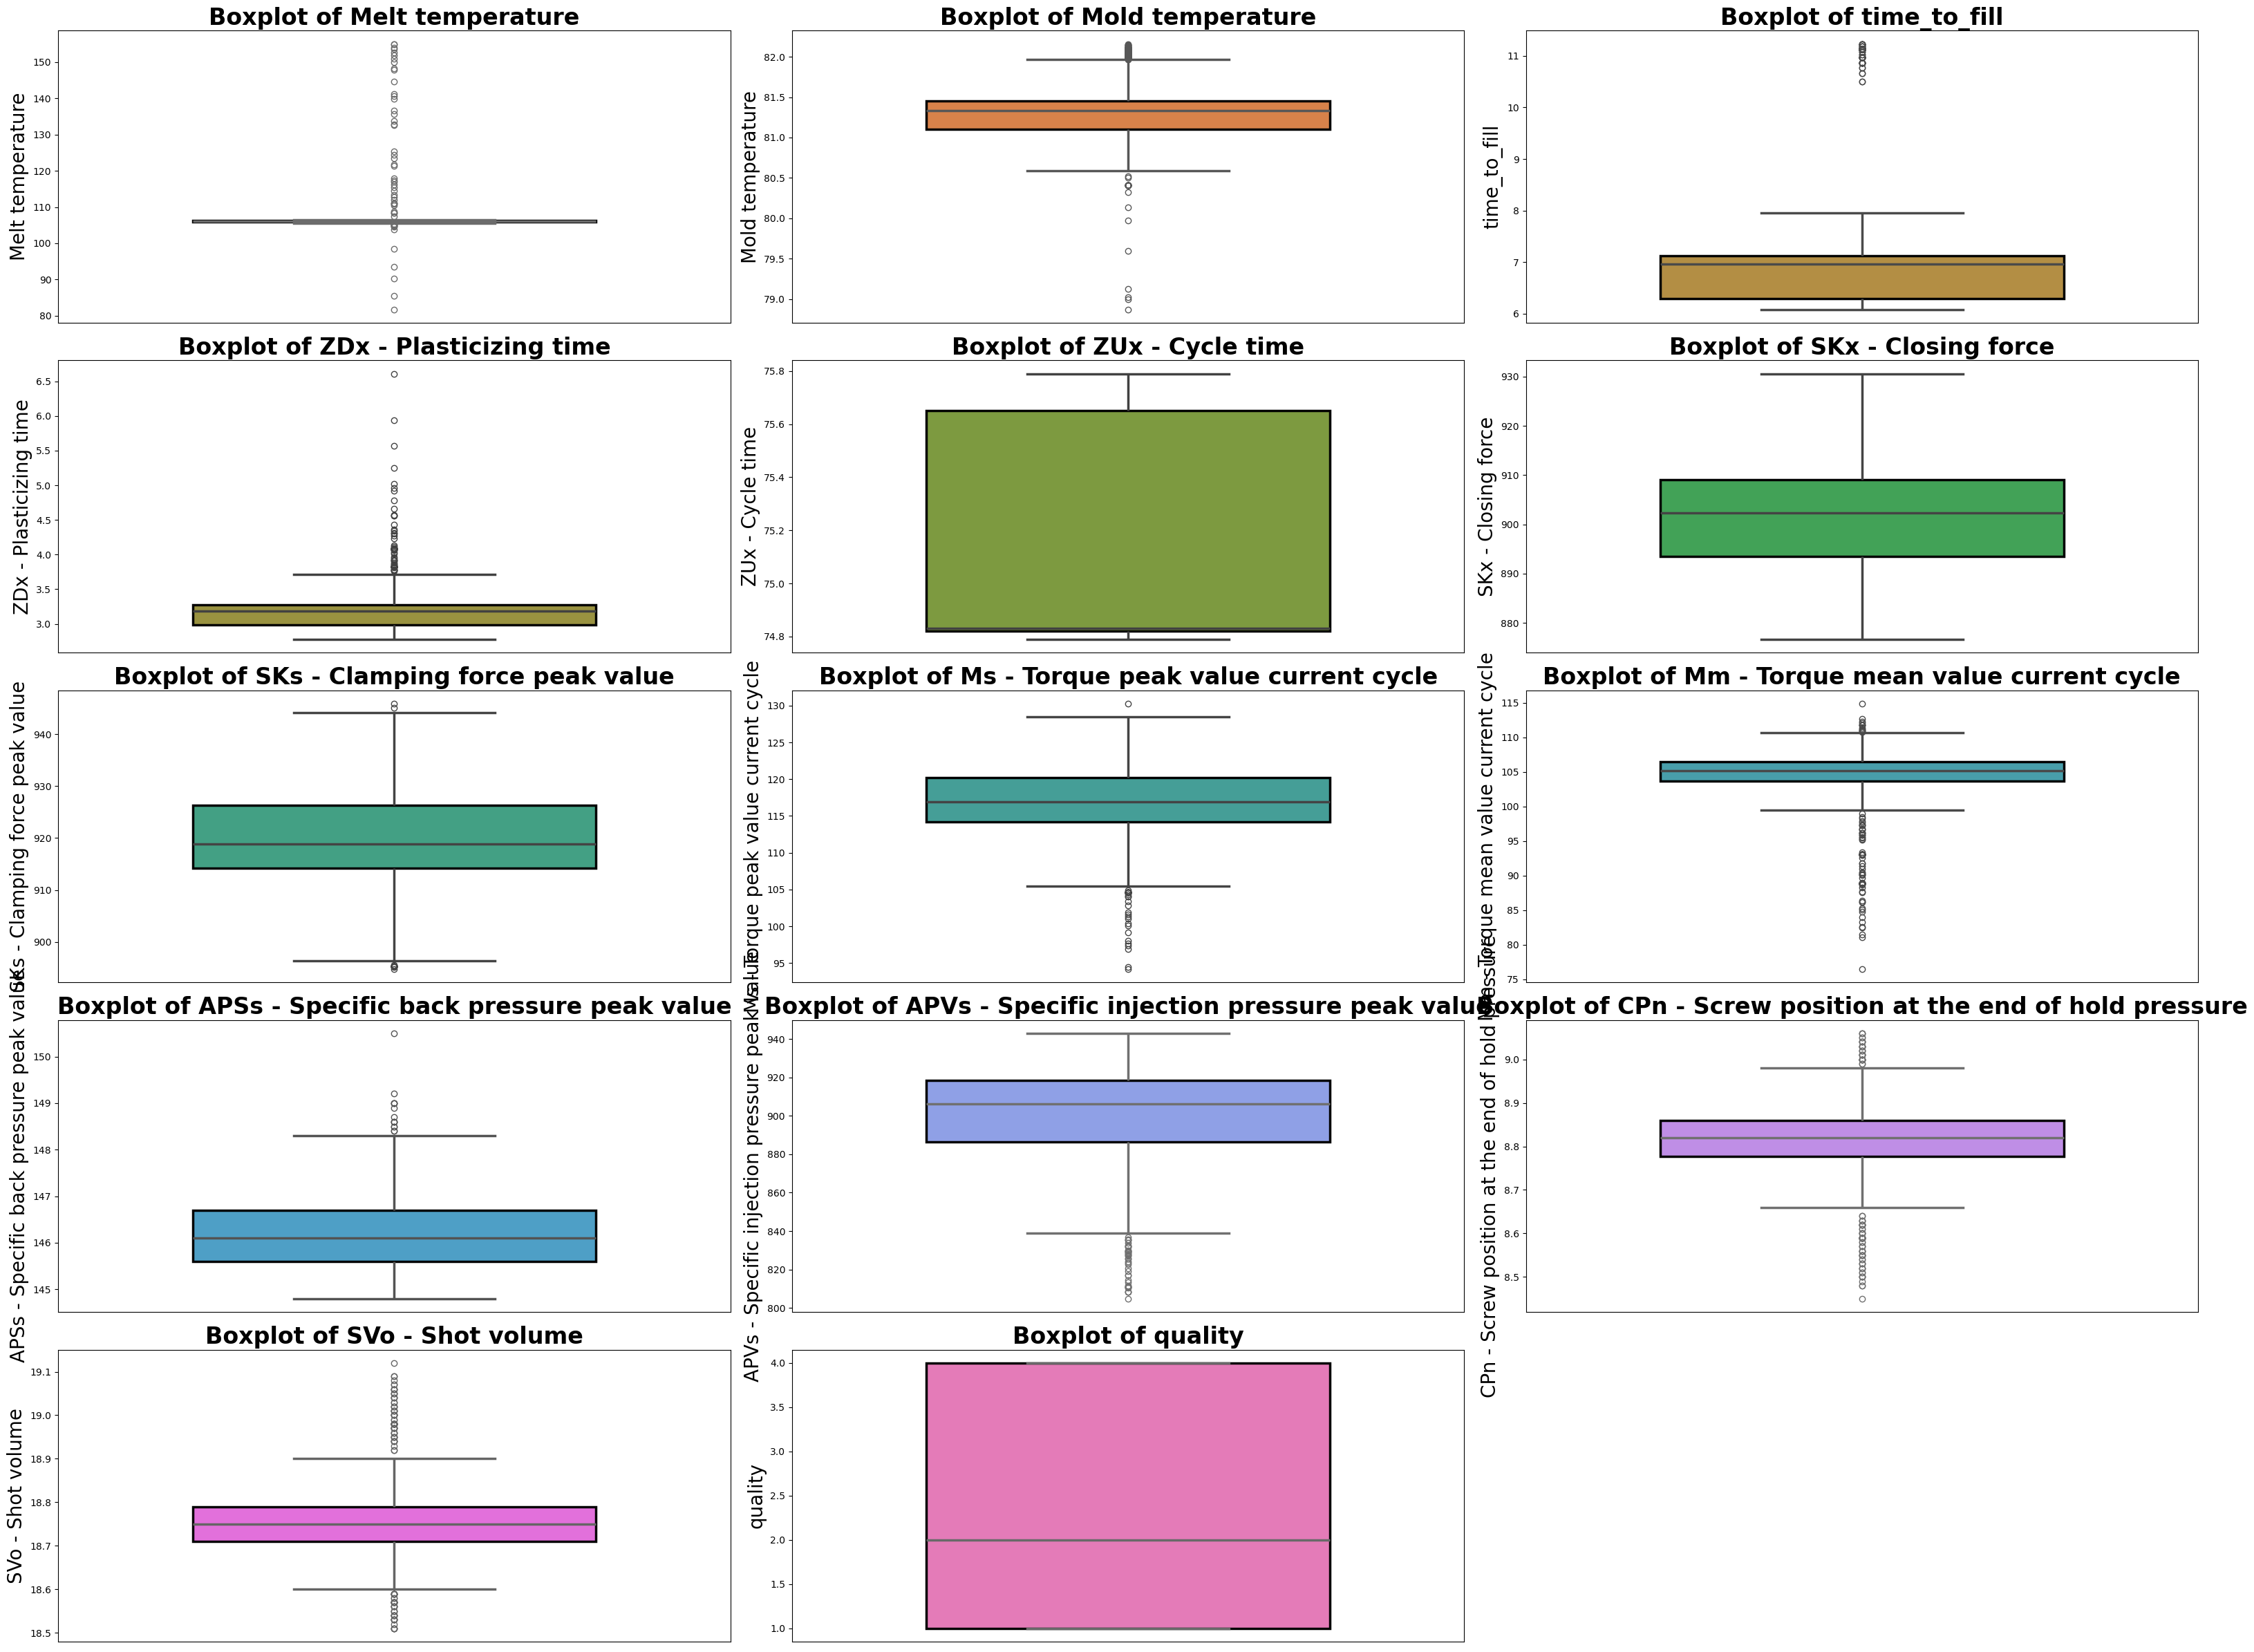

In [14]:
# Define colors for each plot
colors = sns.color_palette("husl", len(num_columns))

# Set figure size
plt.figure(figsize=(32, 24))

# Loop through all numerical columns and create subplots
for i, (col, color) in enumerate(zip(num_columns, colors), 1):
    plt.subplot((len(num_columns) // 3) + 1, 3, i)  # Dynamically adjust grid
    sns.boxplot(y=df[col], color=color, width=0.6, linewidth=2.5, boxprops=dict(edgecolor="black"))
    plt.title(f'Boxplot of {col}', fontsize=24, fontweight='bold')
    plt.ylabel(col, fontsize=20)
    plt.xticks([])  # Remove x-axis ticks

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

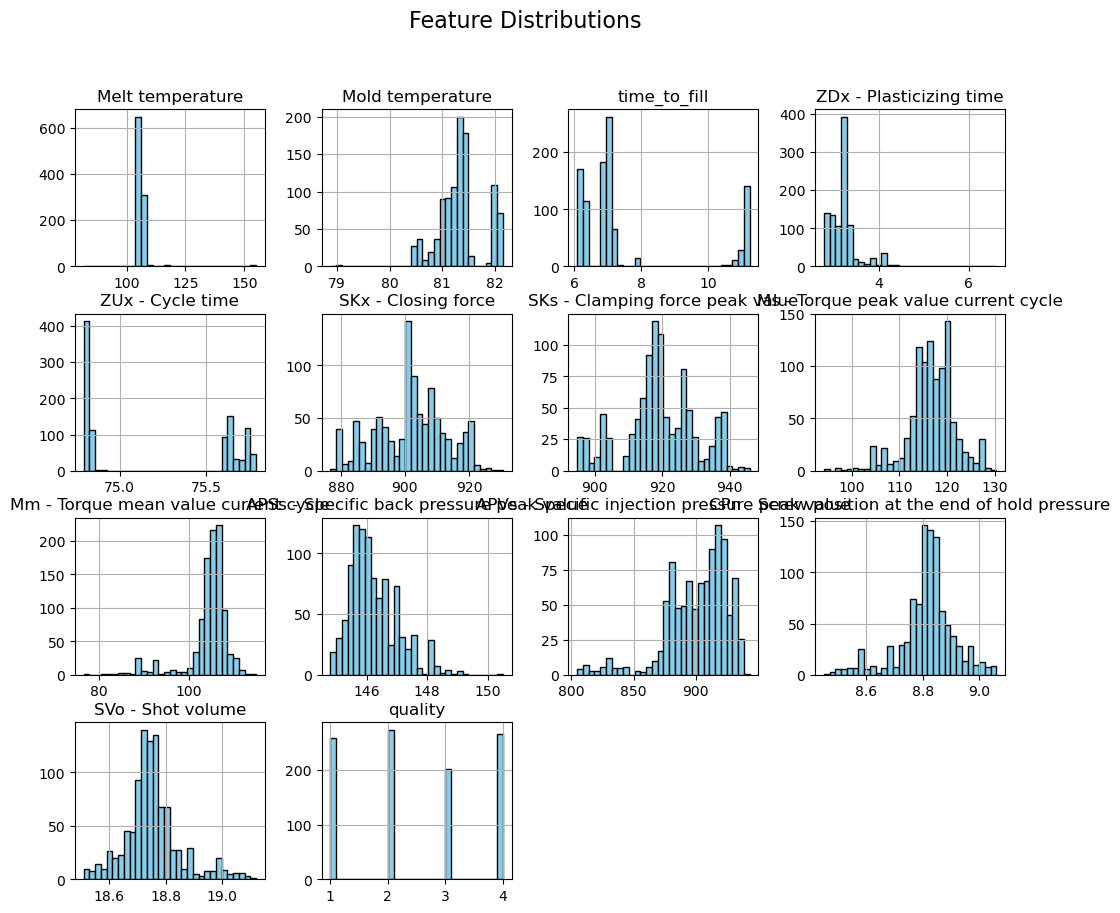

In [15]:
# Set figure size for plots
plt.figure(figsize=(12, 6))

# Histogram of all numerical features
df.hist(bins=30, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

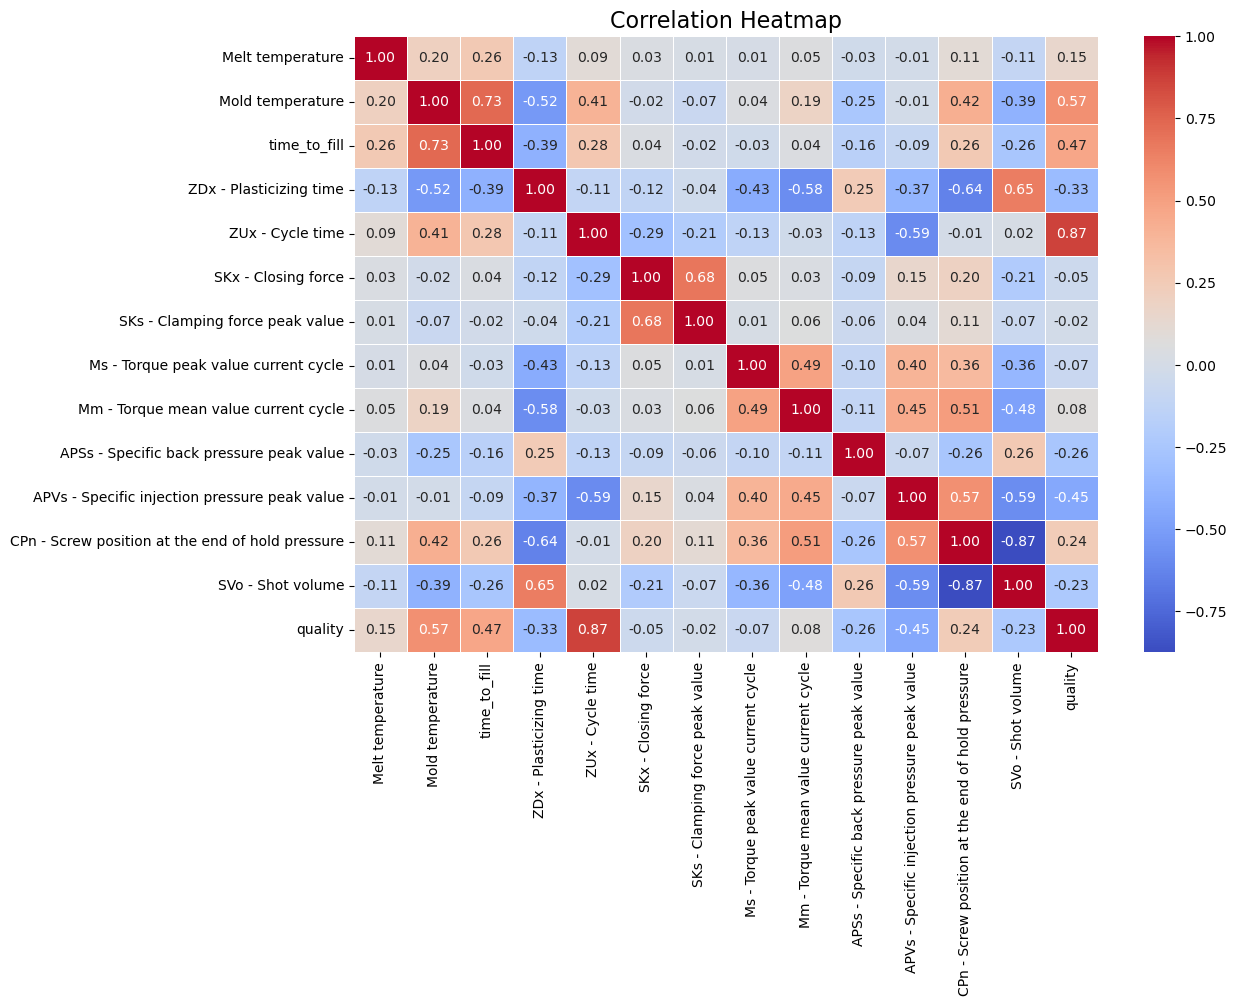

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



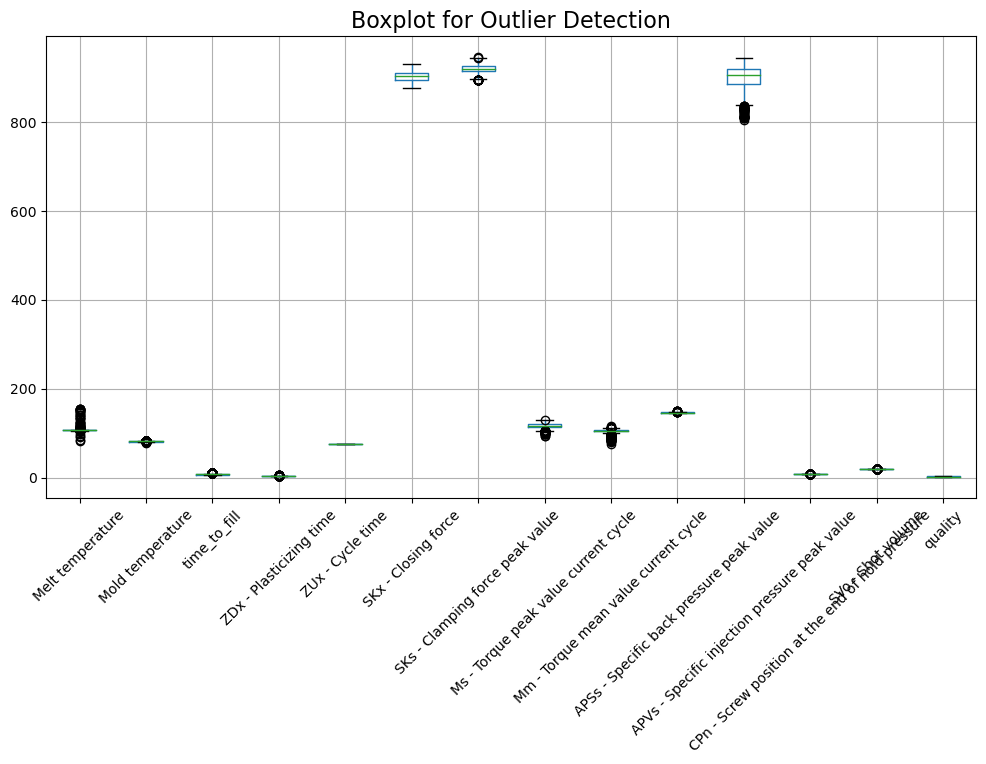

In [17]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.show()


C:\Users\abide\AppData\Local\Temp\ipykernel_66652\3499677248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette='viridis', edgecolor='black')


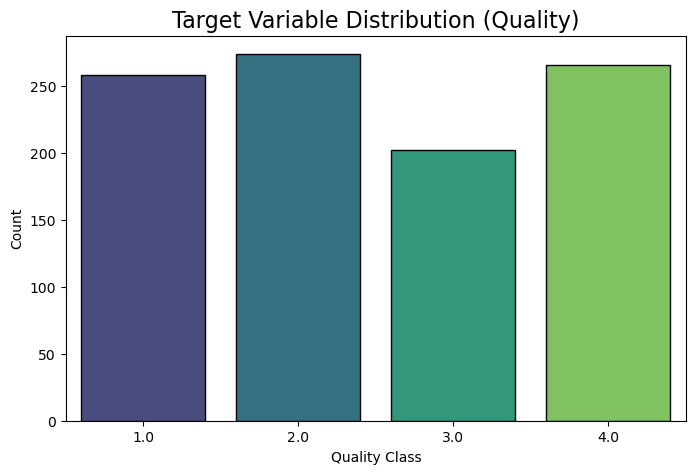

In [18]:
# Distribution of target variable (Quality)
plt.figure(figsize=(8, 5))
sns.countplot(x=df['quality'], palette='viridis', edgecolor='black')
plt.title("Target Variable Distribution (Quality)", fontsize=16)
plt.xlabel("Quality Class")
plt.ylabel("Count")
plt.show()

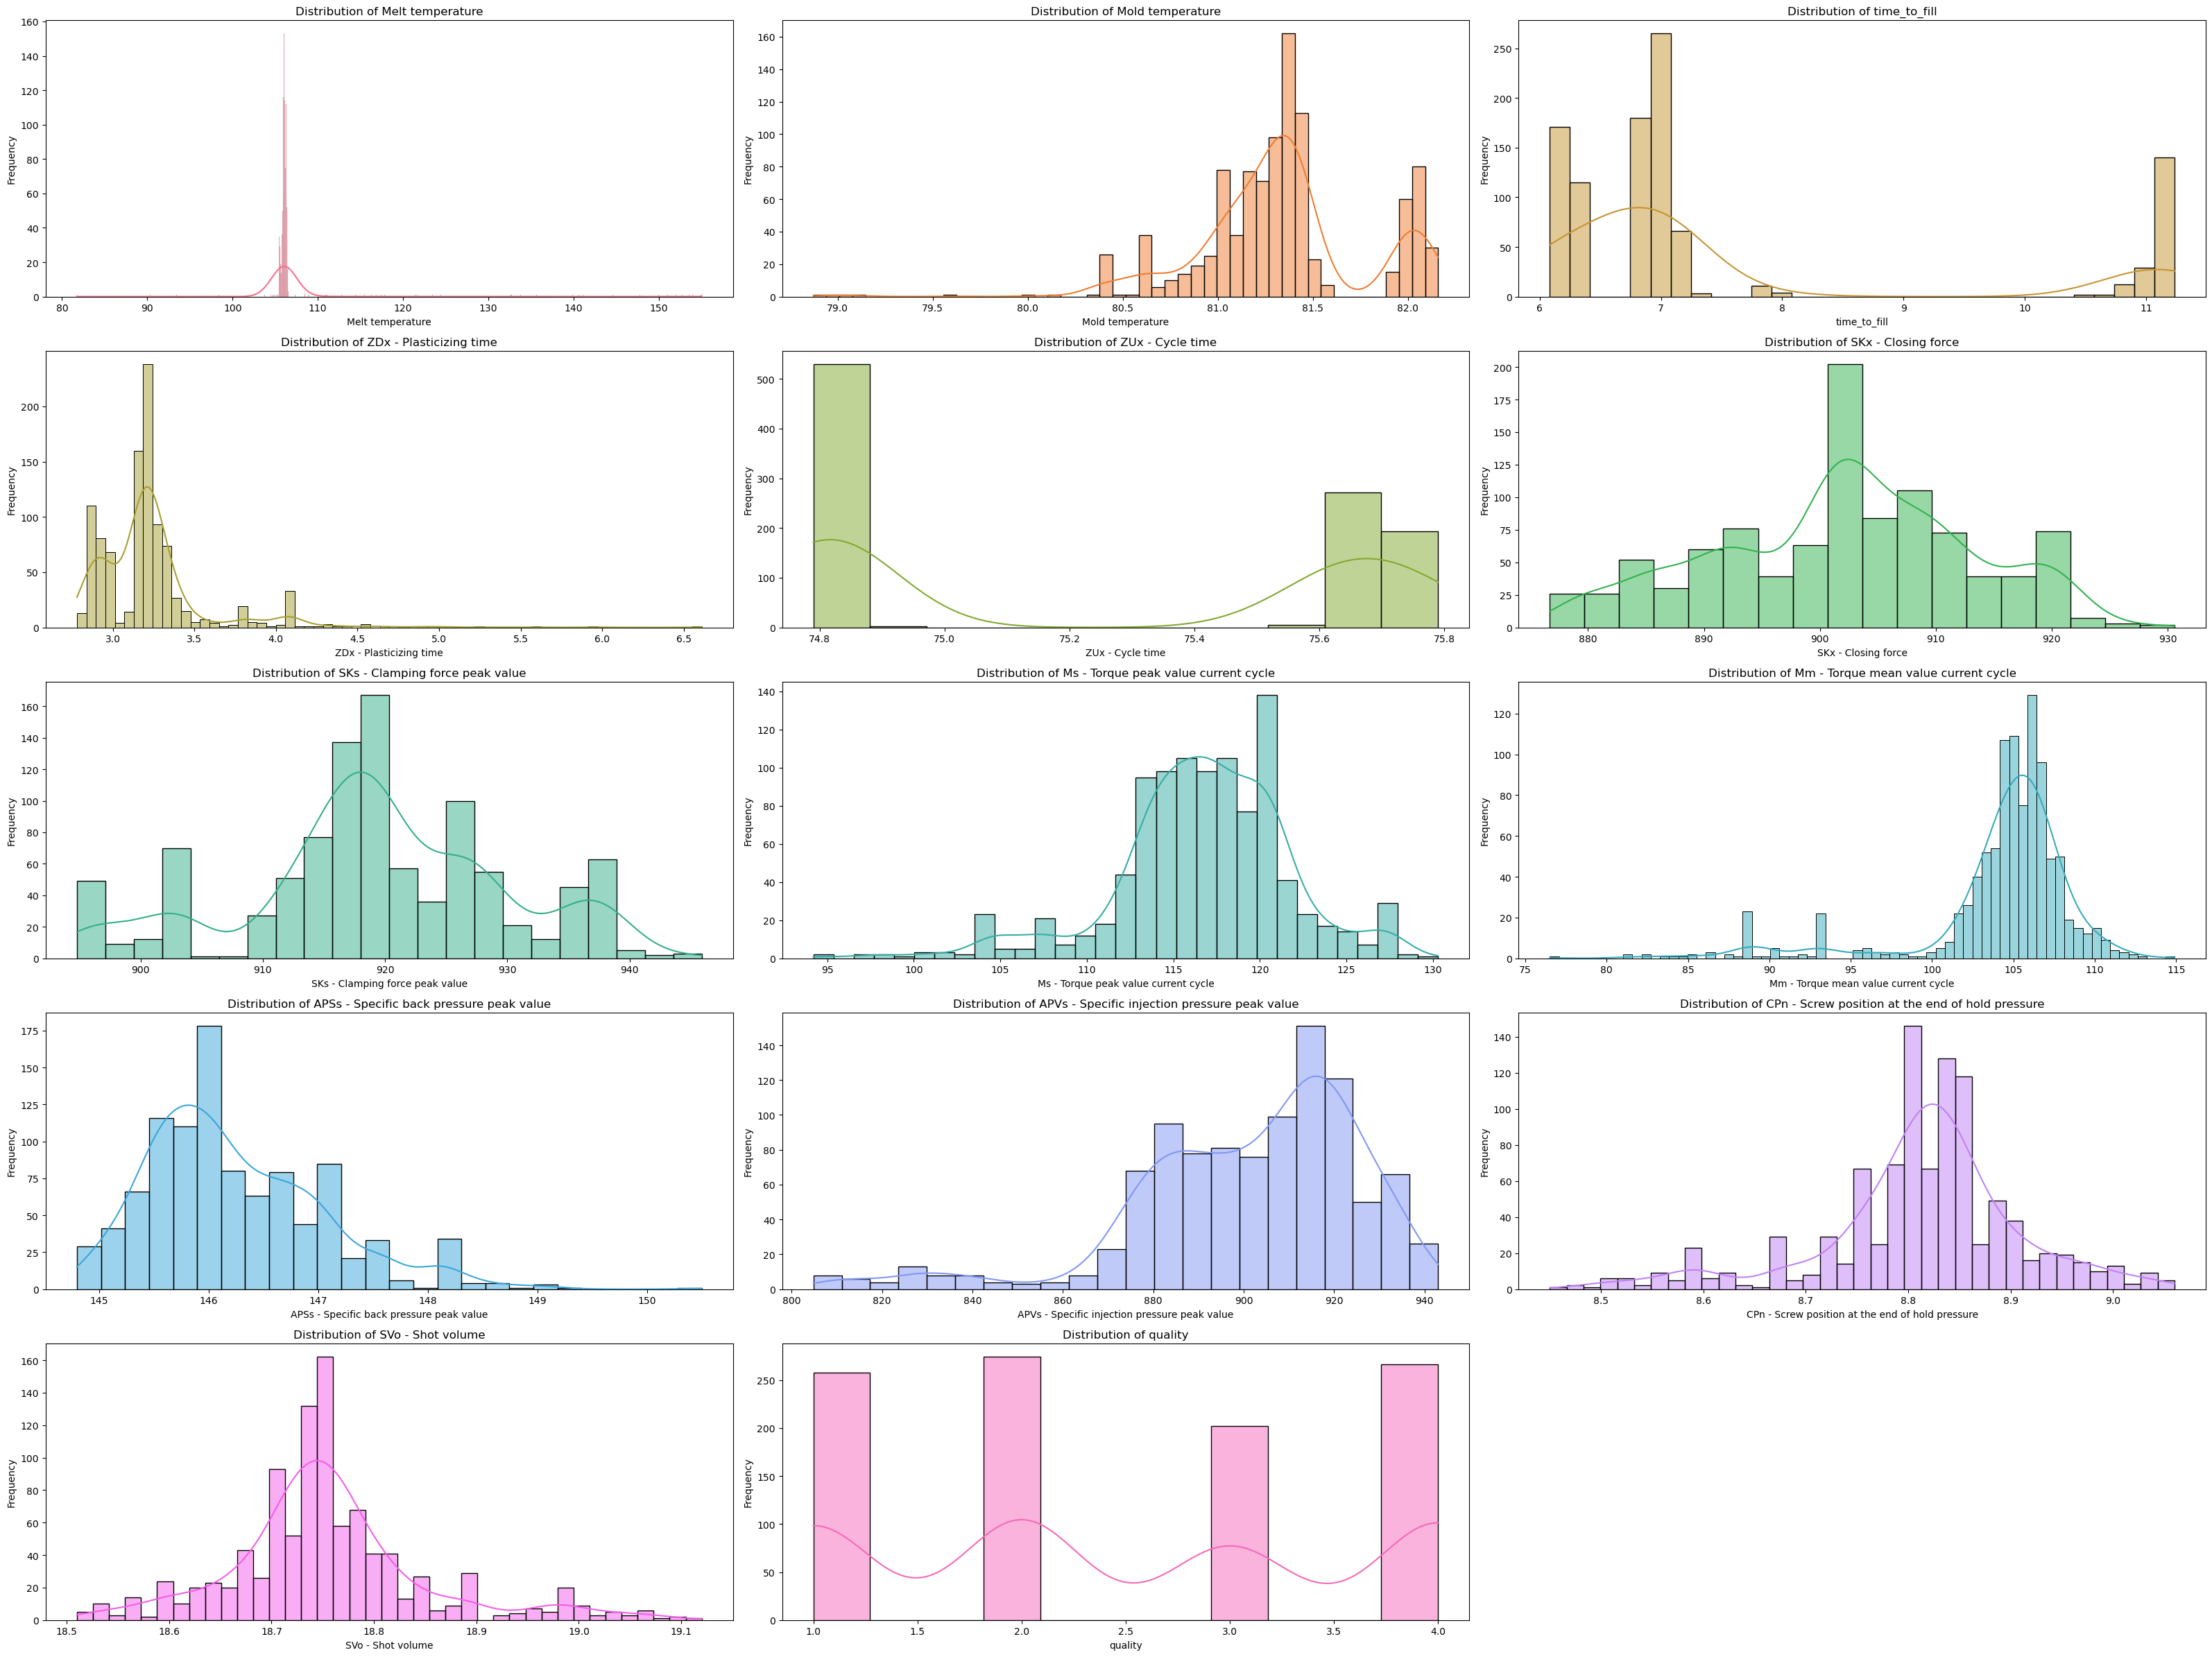

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Identify numerical columns from the DataFrame 'df'
num_columns = df.select_dtypes(include=['number']).columns.tolist()

# Generate a color palette with one color for each numerical column
colors = sns.color_palette("husl", len(num_columns))

# Define the number of columns for the subplot grid (adjust as needed)
n_cols = 3
n_rows = math.ceil(len(num_columns) / n_cols)

# Set the overall figure size
plt.figure(figsize=(32, 24))

# Loop through each numerical column and create a subplot
for i, col in enumerate(num_columns, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], color=colors[i-1], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()

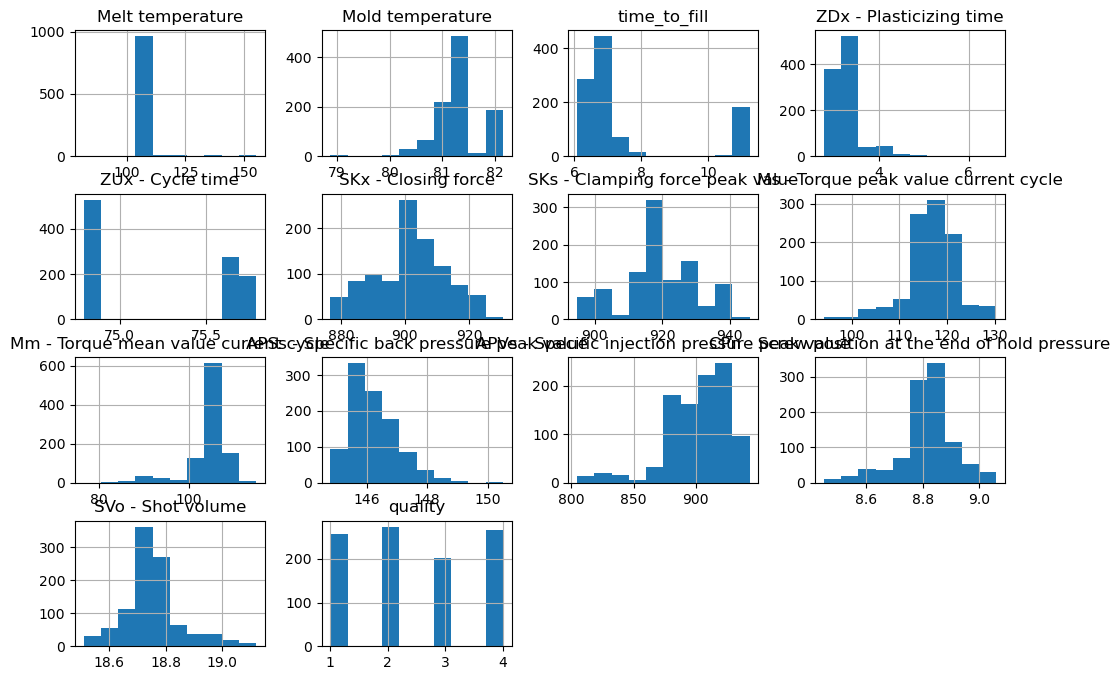

In [20]:
df.hist(figsize=(12,8))
plt.show()


In [21]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


Melt temperature                                    0.0
Mold temperature                                    0.0
time_to_fill                                        0.0
ZDx - Plasticizing time                             0.0
ZUx - Cycle time                                    0.0
SKx - Closing force                                 0.0
SKs - Clamping force peak value                     0.0
Ms - Torque peak value current cycle                0.0
Mm - Torque mean value current cycle                0.0
APSs - Specific back pressure peak value            0.0
APVs - Specific injection pressure peak value       0.0
CPn - Screw position at the end of hold pressure    0.0
SVo - Shot volume                                   0.0
quality                                             0.0
dtype: float64


In [22]:
import scipy.stats as stats

# List of numerical features to test
features = ['Melt temperature', 'Mold temperature', 'time_to_fill', 'ZDx - Plasticizing time',
            'ZUx - Cycle time', 'SKx - Closing force', 'SKs - Clamping force peak value']

# Perform ANOVA for each feature
anova_results = {}
for feature in features:
    groups = [df[df['quality'] == q][feature] for q in df['quality'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = p_value

# Display significant features (p-value < 0.05)
significant_features = {k: v for k, v in anova_results.items() if v < 0.05}
print("Significant Features Affecting Quality Class:")
print(significant_features)


Significant Features Affecting Quality Class:
{'Melt temperature': 7.31298211340568e-08, 'Mold temperature': 4.29816599572475e-130, 'time_to_fill': 1.1058059004708345e-116, 'ZDx - Plasticizing time': 1.808969561523532e-87, 'ZUx - Cycle time': 0.0, 'SKx - Closing force': 3.619092915065186e-65, 'SKs - Clamping force peak value': 7.588322638117408e-48}


                                                   F-statistic        p-value
ZUx - Cycle time                                  1.022896e+04   0.000000e+00
quality                                                    inf   0.000000e+00
Mold temperature                                  3.530549e+02  3.921019e-156
APVs - Specific injection pressure peak value     2.530732e+02  4.743361e-122
ZDx - Plasticizing time                           2.415178e+02  9.651430e-118
time_to_fill                                      2.385427e+02  1.282039e-116
CPn - Screw position at the end of hold pressure  1.810653e+02   1.088478e-93
SVo - Shot volume                                 1.807672e+02   1.453087e-93
SKx - Closing force                               1.248687e+02   1.179057e-68
SKs - Clamping force peak value                   8.580173e+01   2.202523e-49
Melt temperature                                  8.230994e+01   1.415615e-47
APSs - Specific back pressure peak value          3.927164e+01  

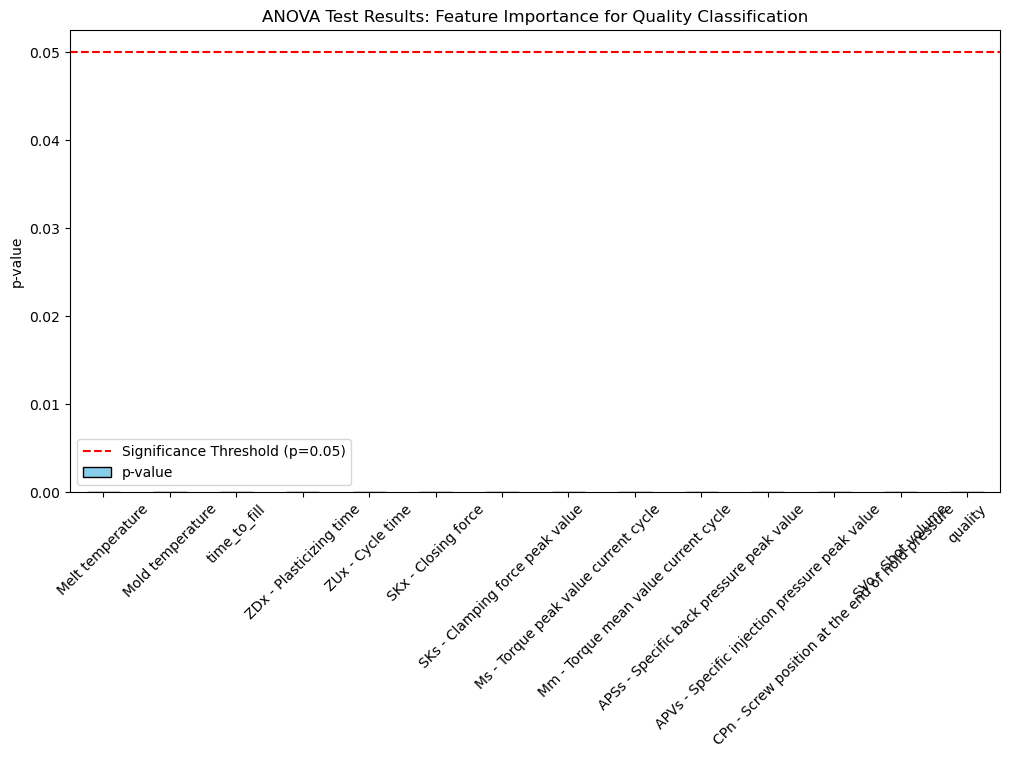

In [86]:
import scipy.stats as stats

# Perform ANOVA for each numerical feature against the 'quality' variable
anova_results = {}
for feature in num_features:
    groups = [df[df['quality'] == q][feature] for q in df['quality'].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}

# Convert results to DataFrame
anova_df = pd.DataFrame(anova_results).T
print(anova_df.sort_values(by="p-value"))

# Visualizing feature importance using ANOVA results
anova_df['p-value'].plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.axhline(y=0.05, color='r', linestyle='--', label="Significance Threshold (p=0.05)")
plt.title("ANOVA Test Results: Feature Importance for Quality Classification")
plt.ylabel("p-value")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [23]:
num_features = df.select_dtypes(include=[np.number]).columns


Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).sum()
print("Outliers per feature:\n", outliers)

Outliers per feature:
 Melt temperature                                     54
Mold temperature                                    193
time_to_fill                                        185
ZDx - Plasticizing time                              85
ZUx - Cycle time                                      0
SKx - Closing force                                   0
SKs - Clamping force peak value                      26
Ms - Torque peak value current cycle                 40
Mm - Torque mean value current cycle                106
APSs - Specific back pressure peak value             14
APVs - Specific injection pressure peak value        40
CPn - Screw position at the end of hold pressure    104
SVo - Shot volume                                   111
quality                                               0
dtype: int64


In [24]:
# Clean column names to remove any hidden characters
df.columns = df.columns.str.replace("\xa0", " ", regex=True).str.strip()

# Add new calculated features
df["Cycle Efficiency"] = df["ZUx - Cycle time"] / df["ZDx - Plasticizing time"]
df["Pressure Ratio"] = df["APVs - Specific injection pressure peak value"] / df["APSs - Specific back pressure peak value"]
df["Torque Stability"] = df["Mm - Torque mean value current cycle"] / df["Ms - Torque peak value current cycle"]
df["Screw Efficiency"] = df["CPn - Screw position at the end of hold pressure"] / df["SVo - Shot volume"]
df["Process Variation"] = df["ZUx - Cycle time"] - df["ZUx - Cycle time"].mean()


In [25]:
for feature in num_features:
    df[feature] = np.clip(df[feature], df[feature].quantile(0.05), df[feature].quantile(0.95))

# Verifying if outliers are capped properly
outliers_after_capping = ((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).sum()
print("Outliers per feature after capping:\n", outliers_after_capping)

Outliers per feature after capping:
 Melt temperature                                      0
Mold temperature                                    157
time_to_fill                                        185
ZDx - Plasticizing time                              85
ZUx - Cycle time                                      0
SKx - Closing force                                   0
SKs - Clamping force peak value                       0
Ms - Torque peak value current cycle                  0
Mm - Torque mean value current cycle                 93
APSs - Specific back pressure peak value              0
APVs - Specific injection pressure peak value         0
CPn - Screw position at the end of hold pressure     72
SVo - Shot volume                                    69
quality                                               0
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target variable

# Splitting the dataset (85% Train, 15% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Display the shape of the splits
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (850, 18), Testing set: (150, 18)


In [27]:
import warnings
warnings.filterwarnings("ignore")


In [28]:
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Feature Scaling for SVM, KNN, and ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', alpha=0.0001, max_iter=1000, random_state=42)
}

# Train each model with 10-fold cross-validation
for name, model in models.items():
    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    scores = cross_val_score(model, X_train_input, y_train, cv=10, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Train models on full training data and evaluate on test set
for name, model in models.items():
    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    X_test_input = X_test_scaled if name in ["SVM", "KNN", "ANN"] else X_test

    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Random Forest: Mean Accuracy = 0.9471, Std = 0.0184
SVM: Mean Accuracy = 0.8553, Std = 0.0380
KNN: Mean Accuracy = 0.8859, Std = 0.0368
Logistic Regression: Mean Accuracy = 0.8235, Std = 0.0414
ANN: Mean Accuracy = 0.9059, Std = 0.0210

Random Forest Classification Report:

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96        39
         2.0       0.95      0.93      0.94        41
         3.0       0.90      0.87      0.88        30
         4.0       0.91      0.97      0.94        40

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150


SVM Classification Report:

              precision    recall  f1-score   support

         1.0       0.80      0.72      0.76        39
         2.0       0.74      0.78      0.76        41
         3.0       0.90      0.87      0.88        30
         4.0       0.91      0.97      0.94 

In [29]:
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Feature Scaling for SVM, KNN, and ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "ANN": {
        "hidden_layer_sizes": [(100,), (200, 100), (300, 150, 75)],
        "activation": ["relu", "tanh"],
        "alpha": [0.0001, 0.001],
        "max_iter": [500, 1000]
    }
}

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "ANN": MLPClassifier(random_state=42)
}

# Perform Grid Search for each model
best_models = {}
for name, model in models.items():
    print(f"Performing Grid Search for {name}...")

    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    X_test_input = X_test_scaled if name in ["SVM", "KNN", "ANN"] else X_test

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_input, y_train)

    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}\n")

# Train best models on full training data and evaluate on test set
print("\n### Model Evaluation on Test Set ###")
for name, model in best_models.items():
    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    X_test_input = X_test_scaled if name in ["SVM", "KNN", "ANN"] else X_test

    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Performing Grid Search for Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9482

Performing Grid Search for SVM...
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9247

Performing Grid Search for KNN...
Best Parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8847

Performing Grid Search for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8471

Performing Grid Search for ANN...
Best Parameters for ANN: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 500}
Best Cross-Validation Accuracy: 0.9176


### Model Evaluation on Test Set ###

Random Forest Classification Report:

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95        3

In [30]:
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Feature Scaling for SVM, KNN, and ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with optimized hyperparameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42),
    "SVM": SVC(C=10, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "Logistic Regression": LogisticRegression(C=1, solver='liblinear', max_iter=500, random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, max_iter=500, random_state=42)
}

# Train each model with 10-fold cross-validation
for name, model in models.items():
    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    scores = cross_val_score(model, X_train_input, y_train, cv=10, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Train models on full training data and evaluate on test set
for name, model in models.items():
    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    X_test_input = X_test_scaled if name in ["SVM", "KNN", "ANN"] else X_test

    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))


Random Forest: Mean Accuracy = 0.9424, Std = 0.0193
SVM: Mean Accuracy = 0.9259, Std = 0.0247
KNN: Mean Accuracy = 0.8859, Std = 0.0368
Logistic Regression: Mean Accuracy = 0.8447, Std = 0.0430
ANN: Mean Accuracy = 0.9224, Std = 0.0253

Random Forest Classification Report:

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95        39
         2.0       0.97      0.88      0.92        41
         3.0       0.90      0.87      0.88        30
         4.0       0.91      0.97      0.94        40

    accuracy                           0.93       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.93      0.93      0.93       150


SVM Classification Report:

              precision    recall  f1-score   support

         1.0       0.97      0.87      0.92        39
         2.0       0.88      0.93      0.90        41
         3.0       0.90      0.87      0.88        30
         4.0       0.91      0.97      0.94 

2.0    274
4.0    266
1.0    258
3.0    202
Name: quality, dtype: int64


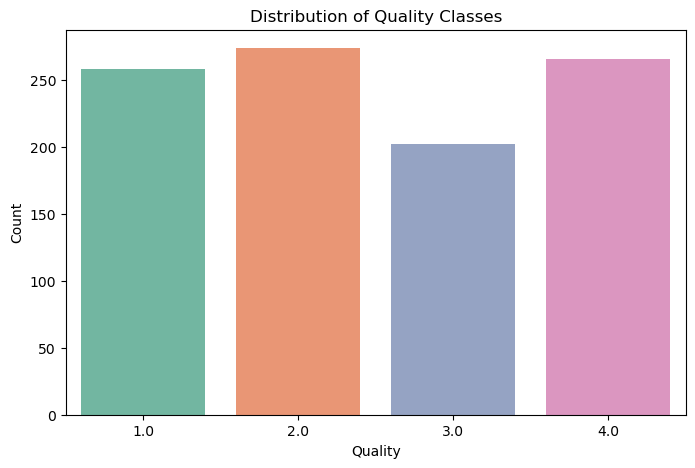

In [31]:
# Count of each quality class
print(df['quality'].value_counts())

# Visualizing class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='Set2')
plt.title("Distribution of Quality Classes")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


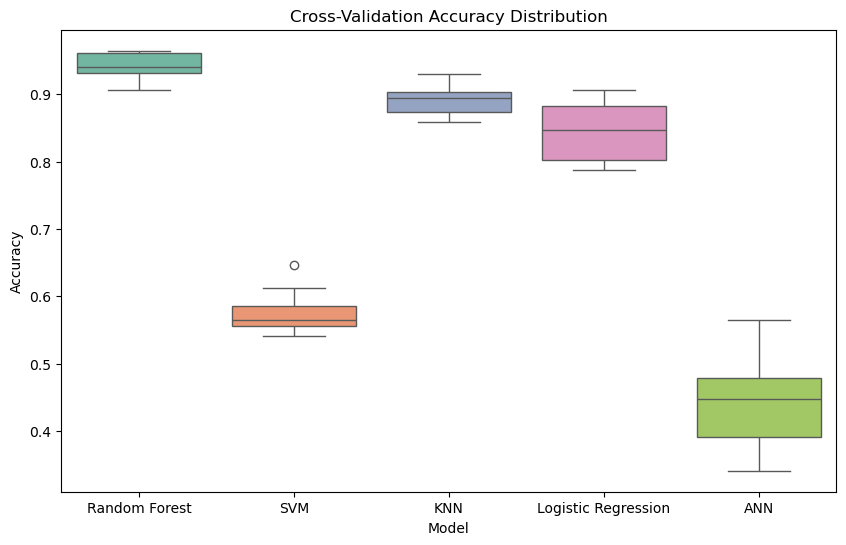

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Collect cross-validation scores
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    for score in scores:
        cv_results.append({"Model": name, "Accuracy": score})

df_cv = pd.DataFrame(cv_results)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Model", y="Accuracy", data=df_cv, palette="Set2")
plt.title("Cross-Validation Accuracy Distribution")
plt.show()


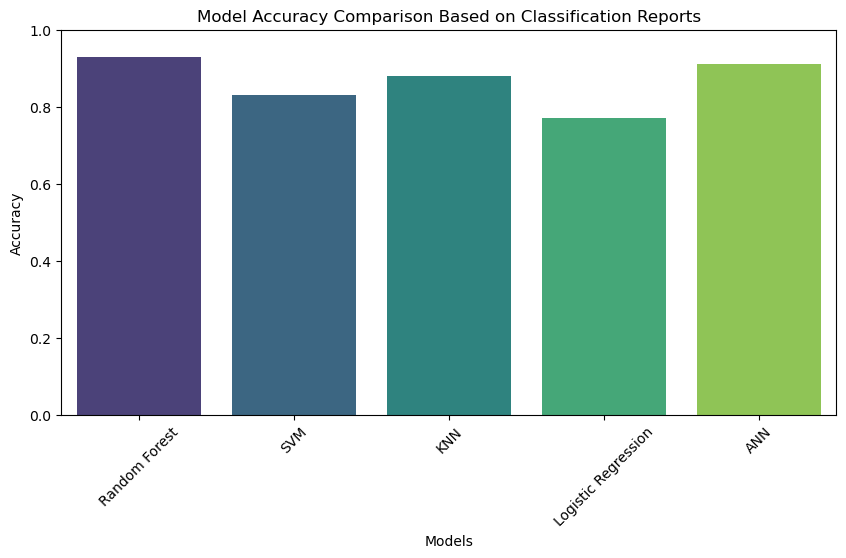

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define model names and accuracy scores based on classification reports
model_names = ["Random Forest", "SVM", "KNN", "Logistic Regression", "ANN"]
accuracy_scores = [0.93, 0.83, 0.88, 0.77, 0.91]

# Bar plot for model accuracy
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison Based on Classification Reports")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

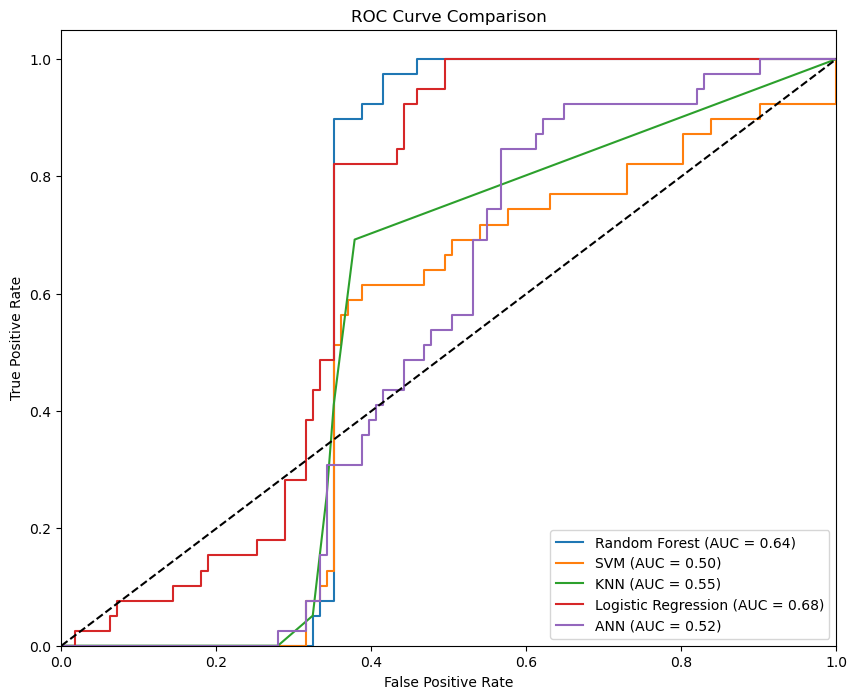

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a plot
plt.figure(figsize=(10, 8))

# Loop through models and plot ROC curve
for name, model in models.items():
    X_test_input = X_test_scaled if name in ["SVM", "KNN", "ANN"] else X_test
    model.fit(X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train, y_train)
    y_pred_proba = model.predict_proba(X_test_input)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

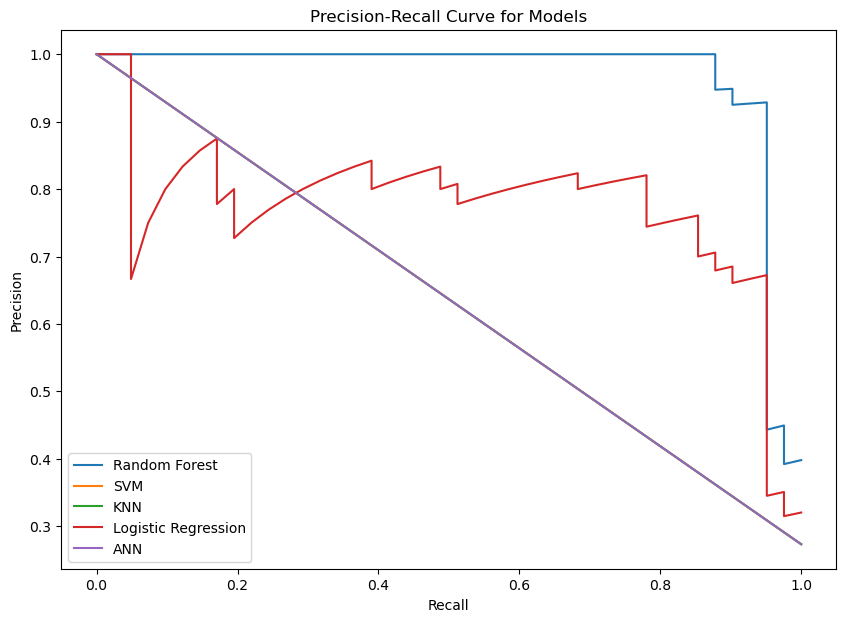

In [35]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 7))

for i, (name, model) in enumerate(models.items()):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    else:
        continue  # Skip models that don't support probability estimates

    precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label=2)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Models')
plt.legend()
plt.show()



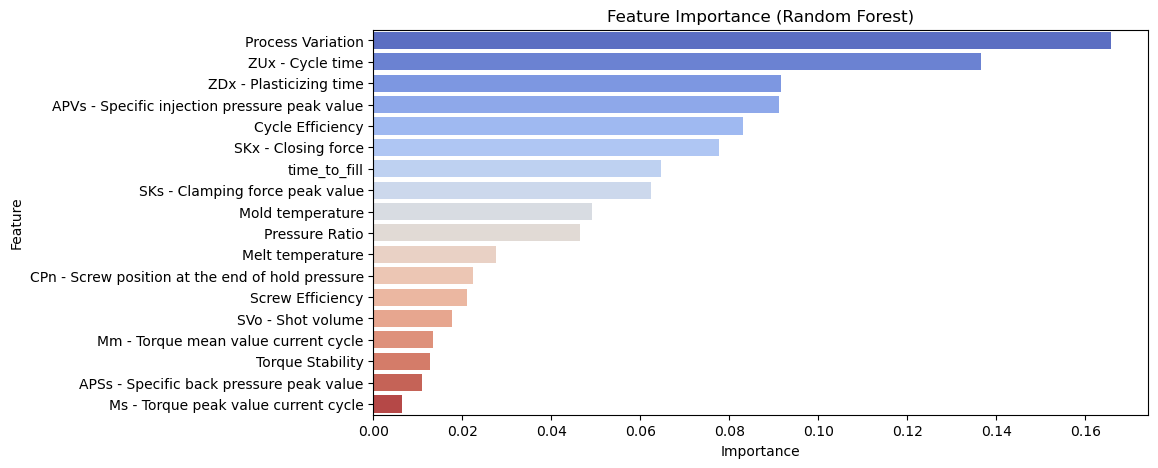

In [36]:
import pandas as pd
import seaborn as sns

# Get feature importances from Random Forest
feature_importances = models["Random Forest"].feature_importances_
feature_names = X_train.columns

# Create DataFrame and sort
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='coolwarm')
plt.title('Feature Importance (Random Forest)')
plt.show()


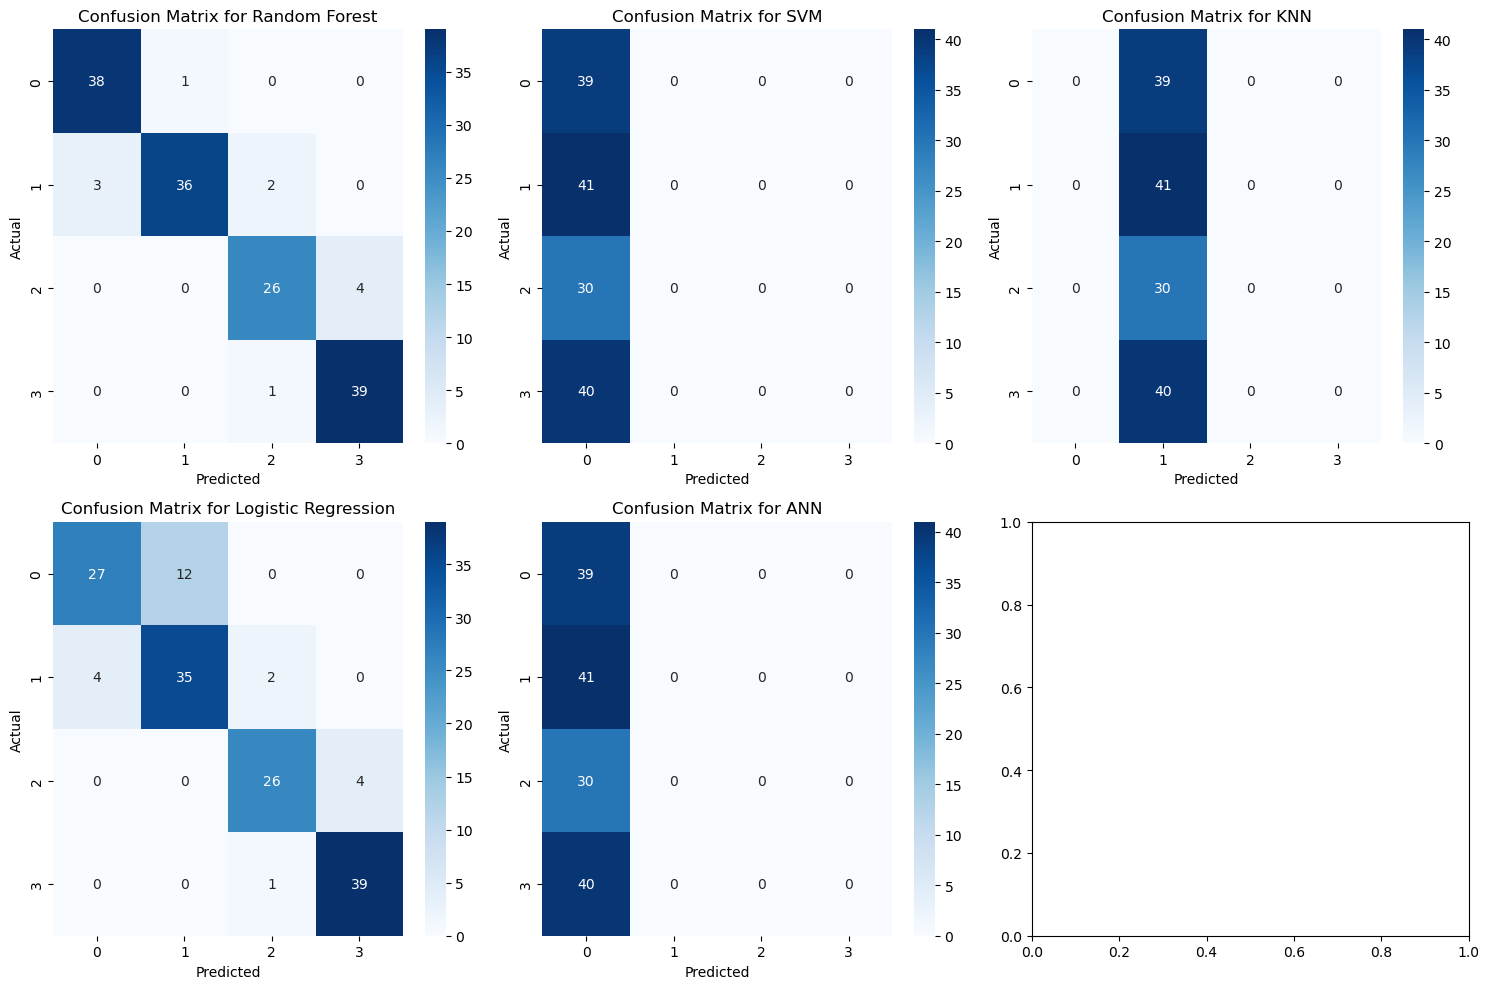

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust grid for 5 models
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


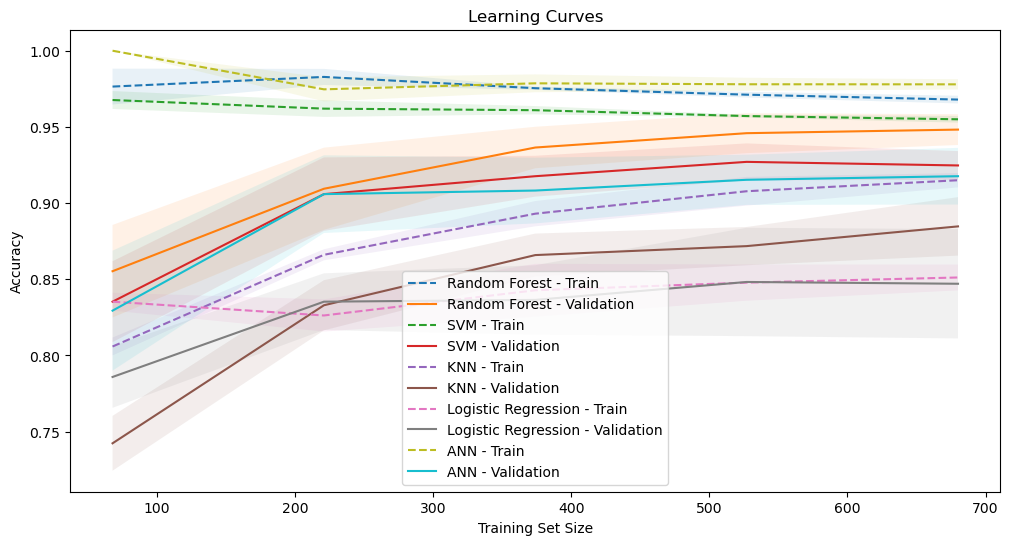

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

plt.figure(figsize=(12, 6))

for name, model in models.items():
    X_train_input = X_train_scaled if name in ["SVM", "KNN", "ANN"] else X_train
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_input, y_train, cv=5, scoring='accuracy')
    
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)
    
    plt.plot(train_sizes, train_mean, label=f'{name} - Train', linestyle='--')
    plt.plot(train_sizes, test_mean, label=f'{name} - Validation')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend()
plt.show()
